<a href="https://colab.research.google.com/github/Txlu-OG/Learn/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/heart.csv')  # Update with your actual path if different
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(df.info())
print(df.isnull().sum())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
     

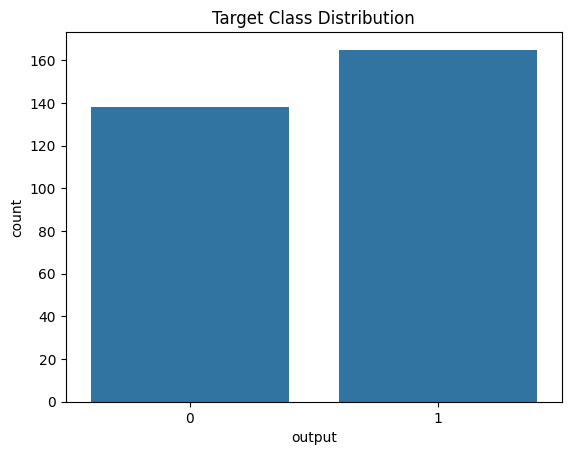

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='output', data=df)
plt.title('Target Class Distribution')
plt.show()


In [5]:
X = df.drop('output', axis=1)
y = df['output']


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred, label):
    print(f"{label} Accuracy:", accuracy_score(y_true, y_pred))
    print(f"{label} Precision:", precision_score(y_true, y_pred))
    print(f"{label} Recall:", recall_score(y_true, y_pred))
    print(f"{label} F1 Score:", f1_score(y_true, y_pred))

print_metrics(y_test, y_pred_lr, 'Logistic Regression')
print_metrics(y_test, y_pred_rf, 'Random Forest')


Logistic Regression Accuracy: 0.8688524590163934
Logistic Regression Precision: 0.875
Logistic Regression Recall: 0.875
Logistic Regression F1 Score: 0.875
Random Forest Accuracy: 0.8524590163934426
Random Forest Precision: 0.8484848484848485
Random Forest Recall: 0.875
Random Forest F1 Score: 0.8615384615384616


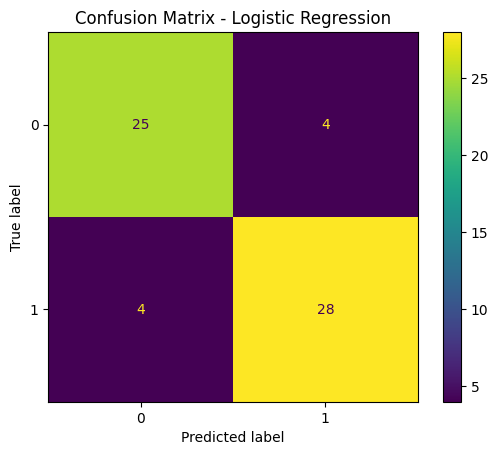

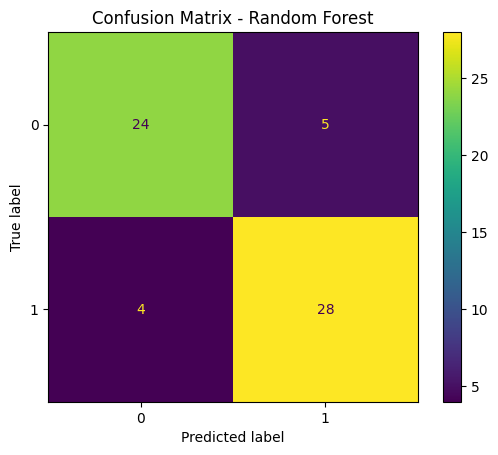

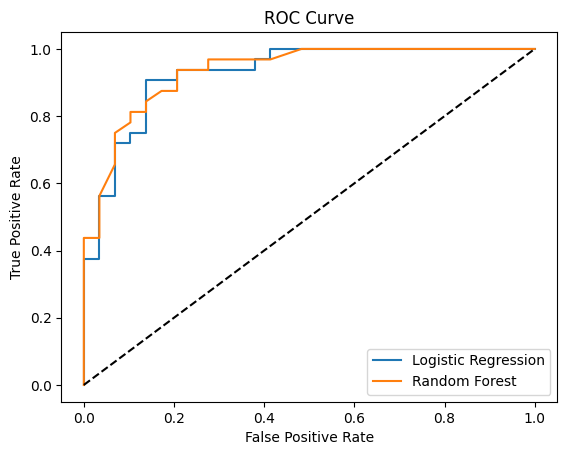

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve

ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()

fpr_lr, tpr_lr, _ = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()
